## This file makes machine learning application for individual packets for Aalto University. 
### Used machine learning algorithms: RF (Random Forest) DT (Decision Trees)

###  importing relevant libraries

In [1]:
%matplotlib inline
from numpy import array
from random import random
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB#57
from sklearn.naive_bayes import GaussianNB#52
from sklearn.naive_bayes import MultinomialNB#56
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

### Discovering dataset

In [2]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./dataset/','.csv')
files_add

['./dataset/Threshold_0.095_Accuracy.csv',
 './dataset/Threshold_0.11.csv',
 './dataset/Main_Sentinel.csv',
 './dataset/Main_Sentinel_Accuracy.csv',
 './dataset/IPAssess_Sentinel_Accuracy.csv',
 './dataset/Threshold_0.1.csv',
 './dataset/Threshold_0.105.csv',
 './dataset/Main_Sentinel_padding_ralert.csv',
 './dataset/Threshold_0.095.csv',
 './dataset/Threshold_0.1_Accuracy.csv',
 './dataset/Threshold_0.11_Accuracy.csv',
 './dataset/Threshold_0.125_Accuracy.csv',
 './dataset/Threshold_0.125.csv',
 './dataset/IPAssess_Sentinel.csv']

### Discovering Labels

In [4]:
def target_names():
    name=files_add[6]
    print(name)
    df = pd.read_csv(name)
    target_names=sorted(list(df[df.columns[-2]].unique()))
    return target_names
target_names=target_names()
len(target_names)

./dataset/Threshold_0.105.csv


25

In [5]:
target_names

['Aria',
 'D-LinkCam',
 'D-LinkDayCam',
 'D-LinkDevice',
 'D-LinkSensor',
 'D-LinkSiren',
 'D-LinkSwitch',
 'D-LinkWaterSensor',
 'EdimaxCam',
 'EdimaxPlug1101W',
 'EdimaxPlug2101W',
 'EdnetCam',
 'EdnetGateway',
 'HomeMaticPlug',
 'Hue-Device',
 'Lightify',
 'MAXGateway',
 'SmarterCoffee',
 'TP-LinkPlugHS100',
 'TP-LinkPlugHS110',
 'WeMoInsightSwitch',
 'WeMoLink',
 'WeMoSwitch',
 'Withings',
 'iKettle2']

### Hyperparameters of machine learning algorithms

In [6]:
ml_list={
"DT_r":DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best'),  
 "Random Forest R":RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=27, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=69,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)}

### This part is the main part of the file. Cross-validates the respective datasets 10-time 10-fold and prints the results (general results, class-based results and confusion matrix).

Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   
et/Threshold_0.105 0   1   DT_r    0.77  0.65  0.72  0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   2   DT_r    0.77  0.65  0.71  0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   3   DT_r    0.77  0.64  0.69  0.64  0.66  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   4   DT_r    0.77  0.65  0.73  0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   5   DT_r    0.78  0.64  0.72  0.64  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   6   DT_r    0.77  0.63  0.7   0.63  0.65  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   7   DT_r    0.77  0.65  0.71  0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   8   DT_r    0.77  0.64  0.71  0.64  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   9   DT_r    0.77  0.65  0.7   0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 0   10  DT_r  

et/Threshold_0.105 8   5   DT_r    0.78  0.64  0.71  0.64  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 8   6   DT_r    0.78  0.64  0.71  0.64  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 8   7   DT_r    0.78  0.63  0.7   0.63  0.66  0.74  0.09     0.0     0.09    
et/Threshold_0.105 8   8   DT_r    0.77  0.66  0.71  0.66  0.68  0.74  0.09     0.0     0.09    
et/Threshold_0.105 8   9   DT_r    0.78  0.65  0.68  0.65  0.66  0.74  0.09     0.0     0.09    
et/Threshold_0.105 8   10  DT_r    0.77  0.64  0.71  0.64  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 9   1   DT_r    0.78  0.65  0.73  0.65  0.67  0.74  0.09     0.0     0.09    
et/Threshold_0.105 9   2   DT_r    0.77  0.64  0.71  0.64  0.66  0.73  0.09     0.0     0.09    
et/Threshold_0.105 9   3   DT_r    0.77  0.64  0.7   0.64  0.66  0.73  0.09     0.0     0.09    
et/Threshold_0.105 9   4   DT_r    0.77  0.65  0.73  0.65  0.68  0.74  0.09     0.0     0.09    
et/Threshold_0.105 9   5   DT_

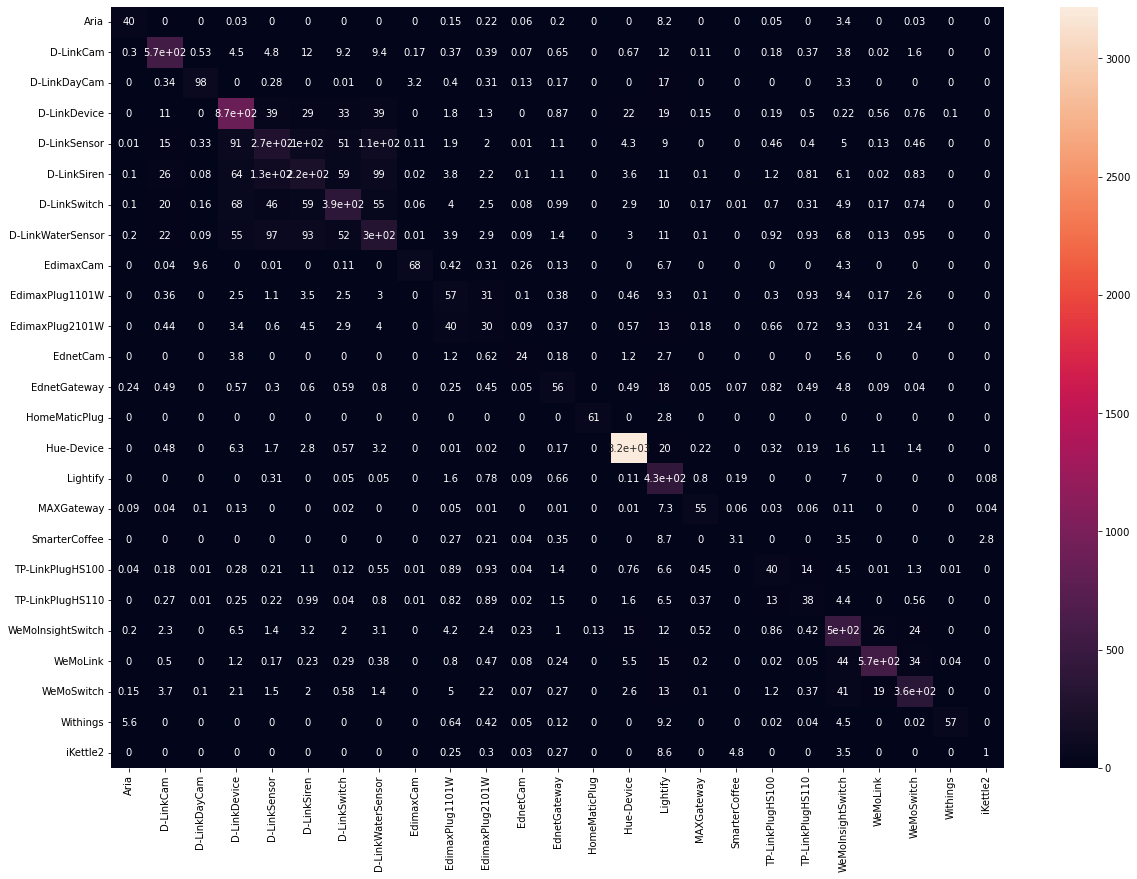





et/Threshold_0.105 0   1   Random  0.78  0.65  0.72  0.65  0.67  0.74  2.21     0.12    2.33    
et/Threshold_0.105 0   2   Random  0.78  0.64  0.7   0.64  0.66  0.74  2.17     0.12    2.3     
et/Threshold_0.105 0   3   Random  0.78  0.65  0.72  0.65  0.67  0.75  2.21     0.13    2.34    
et/Threshold_0.105 0   4   Random  0.78  0.65  0.72  0.65  0.67  0.75  2.18     0.11    2.3     
et/Threshold_0.105 0   5   Random  0.78  0.65  0.74  0.65  0.68  0.75  2.13     0.14    2.27    
et/Threshold_0.105 0   6   Random  0.78  0.66  0.74  0.66  0.69  0.75  2.14     0.13    2.27    
et/Threshold_0.105 0   7   Random  0.78  0.63  0.7   0.63  0.66  0.74  2.06     0.1     2.16    
et/Threshold_0.105 0   8   Random  0.78  0.65  0.71  0.65  0.67  0.74  2.0      0.1     2.1     
et/Threshold_0.105 0   9   Random  0.78  0.66  0.71  0.66  0.68  0.75  1.98     0.1     2.08    
et/Threshold_0.105 0   10  Random  0.78  0.66  0.73  0.66  0.68  0.74  1.96     0.09    2.06    
et/Threshold_0.105 1   1  

et/Threshold_0.105 8   6   Random  0.77  0.65  0.74  0.65  0.68  0.74  1.81     0.08    1.89    
et/Threshold_0.105 8   7   Random  0.78  0.64  0.69  0.64  0.66  0.74  1.88     0.11    1.99    
et/Threshold_0.105 8   8   Random  0.78  0.66  0.72  0.66  0.68  0.75  1.97     0.09    2.06    
et/Threshold_0.105 8   9   Random  0.78  0.65  0.72  0.65  0.67  0.75  1.97     0.1     2.06    
et/Threshold_0.105 8   10  Random  0.78  0.66  0.72  0.66  0.69  0.75  1.89     0.09    1.98    
et/Threshold_0.105 9   1   Random  0.78  0.66  0.71  0.66  0.67  0.74  1.97     0.09    2.06    
et/Threshold_0.105 9   2   Random  0.78  0.64  0.72  0.64  0.67  0.74  2.05     0.1     2.15    
et/Threshold_0.105 9   3   Random  0.78  0.64  0.71  0.64  0.66  0.75  1.95     0.09    2.04    
et/Threshold_0.105 9   4   Random  0.78  0.66  0.74  0.66  0.68  0.74  1.97     0.1     2.08    
et/Threshold_0.105 9   5   Random  0.78  0.66  0.74  0.66  0.69  0.75  2.04     0.09    2.12    
et/Threshold_0.105 9   6   Ran

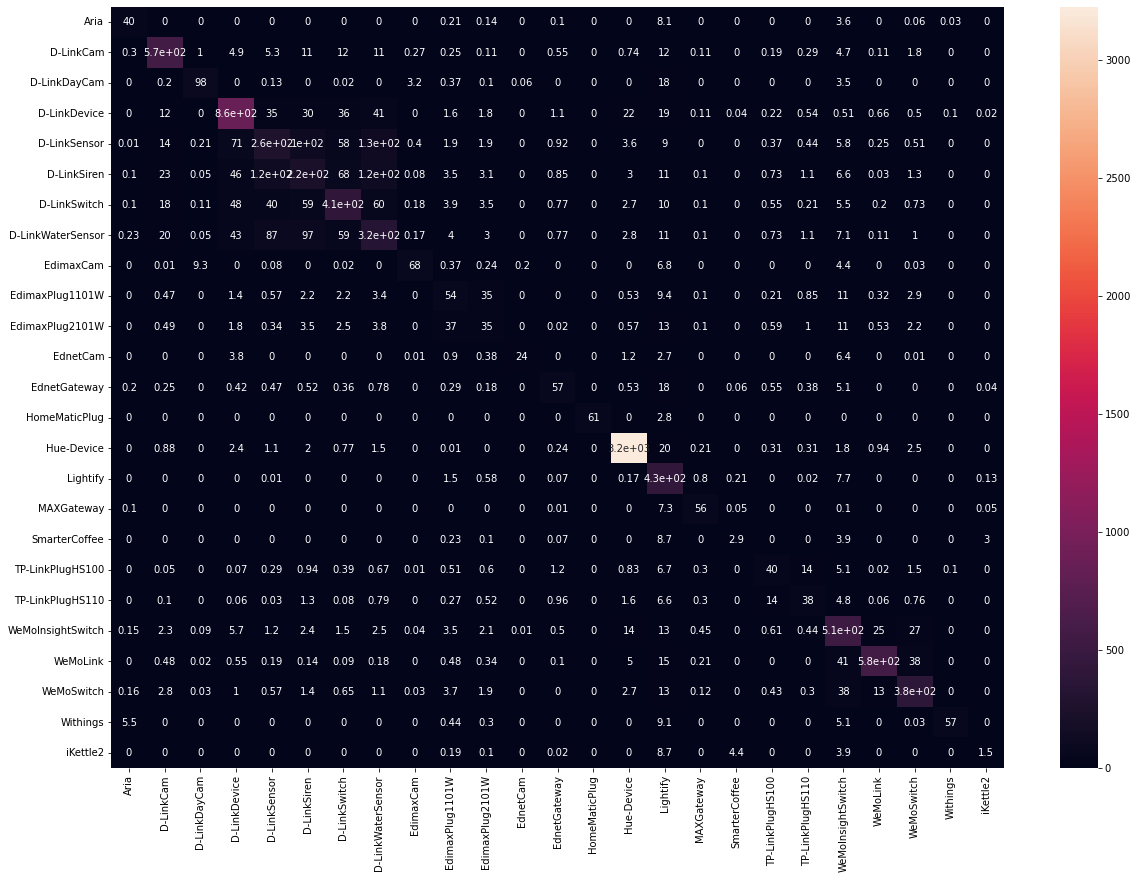

In [7]:
ths = open("dataset/Threshold_0.105_Accuracy.csv", "w")
ths.write("Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time))\n")
repetition=10


from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import Normalizer
print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s'%
           ("Dataset","T","CV","ML alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total"))
curr_file=[]
curr_file.append(files_add[6])
for loop in curr_file:
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        for i in range(repetition):
            rnd = random()
            kfold = KFold(n_splits=10, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop)#,header=None )
            del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            #scaler = Normalizer().fit(X)
            #X = scaler.transform(X)
            # summarize transformed data
            dname=loop[7:-4]
            X.shape
            for train_index, test_index in kfold.split(X):
                results_y=[]
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]
                    #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
                pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
                f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        
                report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
                cr = pd.DataFrame(report).transpose()
                if class_based_results.empty:
                    class_based_results =cr
                else:
                    class_based_results = class_based_results.add(cr, fill_value=0)
                precision.append(float(pr))
                recall.append(float(rc))
                f1.append(float(f_1))
                accuracy_b.append(balanced_accuracy_score( y_test,predict))
                accuracy.append(accuracy_score(y_test, predict))
                #clf.score(X_test, y_test))
                #print(balanced_accuracy_score( y_test,predict))
                #t_time.append(float((time.time()-second)) )
                kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
                labels=None, weights=None, sample_weight=None)),15))
                print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
                    str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),2)), 
                    str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2))))
                lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(round(np.mean(test_time)+np.mean(train_time),15))+"\n")

                ths.write (lines)

                df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
                results_y.append(predict)
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)
 
        print(class_based_results/100) 
        cm=cm/100
        graph_name="confusion matrix" +str(ii)       
        plt.figure(figsize = (20,14))
        sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True)
        plt.savefig(graph_name+'0.105',bbox_inches='tight',format='png')#, dpi=400)
        plt.show()
        #print(cm)
        print("\n\n\n") 
ths.close()  

In [2]:
df = pd.read_csv("dataset/Threshold_0.105_Accuracy.csv")
df 

,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
0,et/Threshold_0.105,0,1,DT_r,0.775683,0.635955,0.708281,0.635955,0.662053,0.741798,0.087701,0.001846,0.089547
1,et/Threshold_0.105,0,2,DT_r,0.778283,0.658787,0.733265,0.658787,0.684182,0.744252,0.085543,0.001820,0.087363
2,et/Threshold_0.105,0,3,DT_r,0.777148,0.651905,0.713557,0.651905,0.674525,0.743550,0.091413,0.001390,0.092803
3,et/Threshold_0.105,0,4,DT_r,0.776777,0.642036,0.706279,0.642036,0.664748,0.742760,0.089031,0.001755,0.090786
4,et/Threshold_0.105,0,5,DT_r,0.781793,0.655582,0.714314,0.655582,0.676806,0.747742,0.086850,0.002164,0.089014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,et/Threshold_0.105,9,6,Random Forest R,0.785509,0.647719,0.704569,0.647719,0.668549,0.752506,2.294939,0.127397,2.422336
196,et/Threshold_0.105,9,7,Random Forest R,0.783372,0.658330,0.729566,0.658330,0.680865,0.750420,2.317198,0.098796,2.415994
197,et/Threshold_0.105,9,8,Random Forest R,0.779471,0.648421,0.728944,0.648421,0.674777,0.746107,2.252666,0.101403,2.354069
198,et/Threshold_0.105,9,9,Random Forest R,0.774826,0.654512,0.729334,0.654512,0.677611,0.741156,2.134149,0.112351,2.246500


In [3]:
df1=df[df['ML algorithm']=='DT_r']
print(f'Accuracy: {df1["Acc"].mean()}')
print(f'Test-Time: {df1["test-Time"].mean()}')
print(f'Train-Time: {df1["total-Time))"].mean()}')
df1

Accuracy: 0.774523486705623
Test-Time: 0.0018200850486755008
Train-Time: 0.08825603961944582


,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
0,et/Threshold_0.105,0,1,DT_r,0.775683,0.635955,0.708281,0.635955,0.662053,0.741798,0.087701,0.001846,0.089547
1,et/Threshold_0.105,0,2,DT_r,0.778283,0.658787,0.733265,0.658787,0.684182,0.744252,0.085543,0.001820,0.087363
2,et/Threshold_0.105,0,3,DT_r,0.777148,0.651905,0.713557,0.651905,0.674525,0.743550,0.091413,0.001390,0.092803
3,et/Threshold_0.105,0,4,DT_r,0.776777,0.642036,0.706279,0.642036,0.664748,0.742760,0.089031,0.001755,0.090786
4,et/Threshold_0.105,0,5,DT_r,0.781793,0.655582,0.714314,0.655582,0.676806,0.747742,0.086850,0.002164,0.089014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,et/Threshold_0.105,9,6,DT_r,0.767209,0.634313,0.705071,0.634313,0.657460,0.730934,0.086334,0.001337,0.087671
96,et/Threshold_0.105,9,7,DT_r,0.767487,0.643271,0.709625,0.643271,0.664398,0.731957,0.087554,0.001520,0.089074
97,et/Threshold_0.105,9,8,DT_r,0.779842,0.656177,0.733355,0.656177,0.683110,0.747151,0.085896,0.001617,0.087513
98,et/Threshold_0.105,9,9,DT_r,0.775197,0.663328,0.707188,0.663328,0.678915,0.741279,0.083212,0.001328,0.084540


In [4]:
df2=df[df['ML algorithm']=='Random Forest R']
print(f'Accuracy: {df2["Acc"].mean()}')
print(f'Test-Time: {df2["test-Time"].mean()}')
print(f'Train-Time: {df2["total-Time))"].mean()}')
df2

Accuracy: 0.7787454058591675
Test-Time: 0.10977932453155514
Train-Time: 2.2979791283607485


,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
100,et/Threshold_0.105,0,1,Random Forest R,0.776983,0.659856,0.710043,0.659856,0.678563,0.743035,1.988963,0.104677,2.093640
101,et/Threshold_0.105,0,2,Random Forest R,0.774289,0.644733,0.701790,0.644733,0.664087,0.740549,1.985823,0.117268,2.103091
102,et/Threshold_0.105,0,3,Random Forest R,0.786252,0.648233,0.707305,0.648233,0.668523,0.753704,1.998913,0.099383,2.098296
103,et/Threshold_0.105,0,4,Random Forest R,0.775941,0.657376,0.733768,0.657376,0.682952,0.742635,1.975587,0.097091,2.072678
104,et/Threshold_0.105,0,5,Random Forest R,0.779749,0.648473,0.730976,0.648473,0.672048,0.745722,2.014029,0.109318,2.123347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,et/Threshold_0.105,9,6,Random Forest R,0.785509,0.647719,0.704569,0.647719,0.668549,0.752506,2.294939,0.127397,2.422336
196,et/Threshold_0.105,9,7,Random Forest R,0.783372,0.658330,0.729566,0.658330,0.680865,0.750420,2.317198,0.098796,2.415994
197,et/Threshold_0.105,9,8,Random Forest R,0.779471,0.648421,0.728944,0.648421,0.674777,0.746107,2.252666,0.101403,2.354069
198,et/Threshold_0.105,9,9,Random Forest R,0.774826,0.654512,0.729334,0.654512,0.677611,0.741156,2.134149,0.112351,2.246500
